In [6]:
import torch
from transformers import AutoTokenizer

### Understanding how pipelines work

In [7]:
from transformers import pipeline

classifier= pipeline("sentiment-analysis")

classifier(
            ["I am a great guy with some anger problems",
            "i am a healthy person with strict diet"]
           )


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.999092698097229},
 {'label': 'POSITIVE', 'score': 0.9991883635520935}]

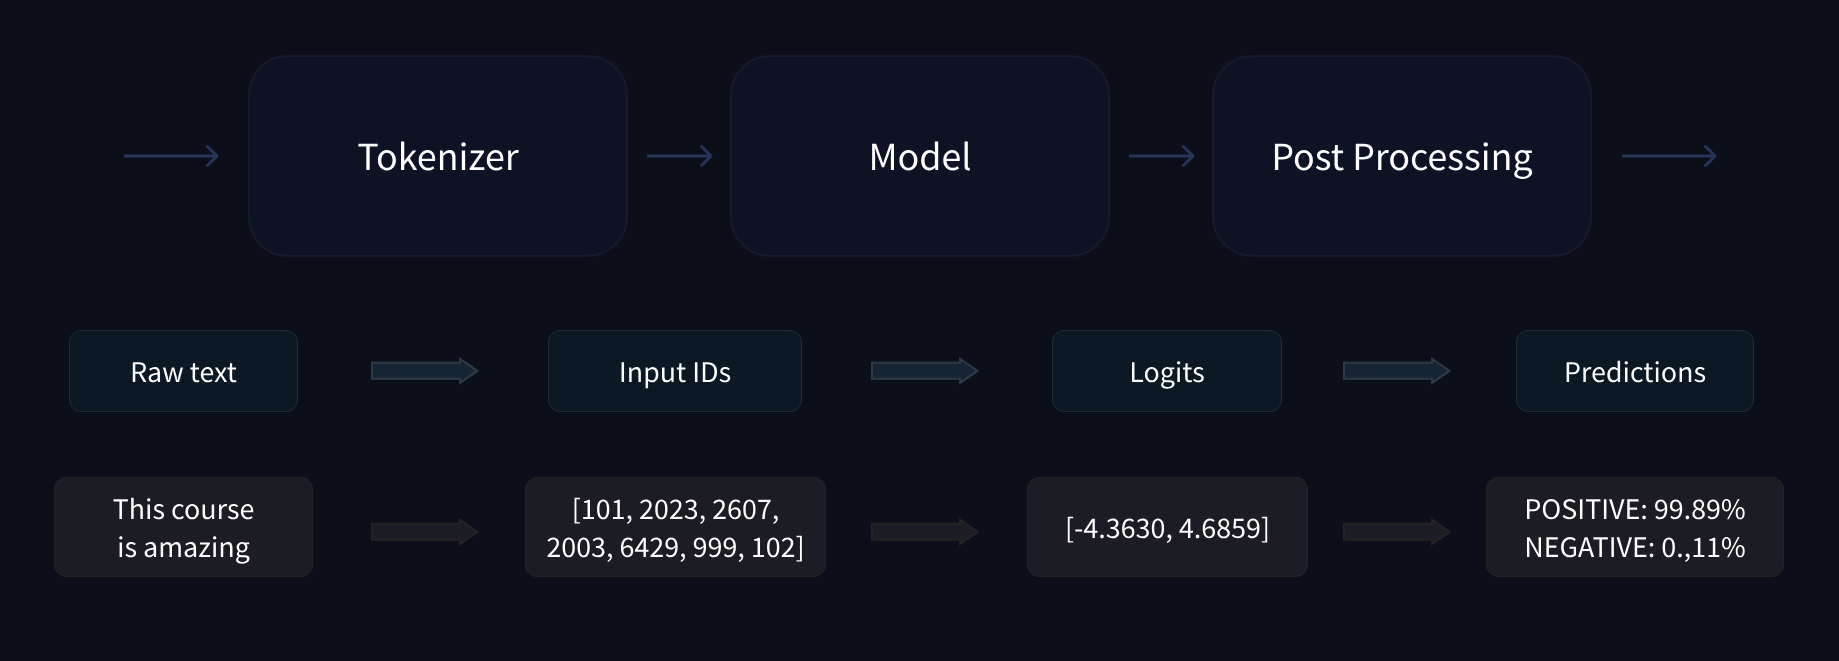

### Understanding Pre-processing with Tokenizer

Like other neural networks, Transformer models can’t process raw text directly, so the first step of our pipeline is to convert the text inputs into numbers that the model can make sense of. To do this we use a `tokenizer`, which will be responsible for:

1. Splitting the input into words, subwords, or symbols (like punctuation) that are called tokens

2. Mapping each token to an integer

3. Adding additional inputs that may be useful to the model

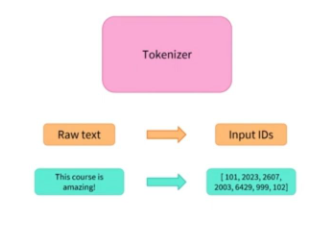

In [8]:
from transformers import AutoTokenizer

tokenizer= AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Transformer models only accept tensors as input. You can think of them as NumPy arrays instead. A NumPy array can be a scalar (0D), a vector (1D), a matrix (2D), or have more dimensions.

In [9]:
input_sentence= ["I am a great guy with some anger problems",
                  "i am a healthy person with strict diet"]

inputs= tokenizer(input_sentence, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[ 101, 1045, 2572, 1037, 2307, 3124, 2007, 2070, 4963, 3471,  102],
        [ 101, 1045, 2572, 1037, 7965, 2711, 2007, 9384, 8738,  102,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])}


We can download our pretrained model the same way we did with our tokenizer Transformers provides an AutoModel class which also has a from_pretrained() method:

### Model

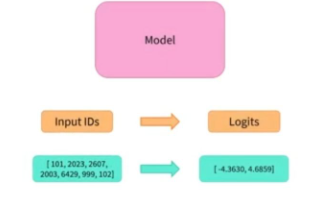

In [10]:
from transformers import AutoModel

model= AutoModel.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [11]:
print(model)

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

The vector output by the Transformer module is usually large. It generally has three dimensions:

**Batch size:** The number of sequences processed at a time (2 in our example).

**Sequence length:** The length of the numerical representation of the sequence (11 in our example).

**Hidden size:** The vector dimension of each model input.

In [12]:
output= model(**inputs)
print(output.last_hidden_state.shape)

torch.Size([2, 11, 768])


In [14]:
output.last_hidden_state

tensor([[[ 0.2694,  0.1559,  0.3139,  ...,  0.2475,  1.0221, -0.4286],
         [ 0.7489,  0.2976,  0.0599,  ...,  0.2472,  1.2214, -0.3517],
         [ 0.6442,  0.3217,  0.0638,  ...,  0.1651,  1.1428, -0.2804],
         ...,
         [-0.2555,  0.4992, -0.0668,  ..., -0.0414,  0.4044, -0.3487],
         [-0.8595,  0.5131,  0.3112,  ..., -0.1829, -0.0649, -0.5430],
         [ 0.8673,  0.0725,  0.2542,  ...,  0.5090,  0.3350, -0.8177]],

        [[ 0.6690, -0.1197,  0.3275,  ...,  0.2884,  0.8382, -0.0071],
         [ 1.0073, -0.0230,  0.2908,  ...,  0.4395,  0.9659,  0.0899],
         [ 0.7873, -0.0019,  0.2906,  ...,  0.4492,  0.8410,  0.1316],
         ...,
         [ 0.6517, -0.0373,  0.2384,  ...,  0.1987,  0.5034, -0.1461],
         [ 1.2059, -0.1382,  0.5495,  ...,  0.7892,  0.3035, -0.7023],
         [ 0.5299, -0.4172,  0.4003,  ...,  0.2306,  0.3519,  0.0834]]],
       grad_fn=<NativeLayerNormBackward0>)

For our example, we will need a model with a sequence classification head (to be able to classify the sentences as positive or negative). So, we won’t actually use the AutoModel class, but AutoModelForSequenceClassification:

In [15]:
from transformers import AutoModelForSequenceClassification

model= AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
outputs = model(**inputs)

In [16]:
outputs.logits.shape

torch.Size([2, 2])

In [17]:
outputs.logits

tensor([[-3.3904,  3.6138],
        [-3.4804,  3.6353]], grad_fn=<AddmmBackward0>)

### Postprocessing the output

In [20]:
import torch

prediction= torch.nn.functional.softmax(outputs.logits, dim=-1)
print(prediction)

tensor([[9.0729e-04, 9.9909e-01],
        [8.1159e-04, 9.9919e-01]], grad_fn=<SoftmaxBackward0>)


In [21]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

# Models

AutoModel class, which is handy when you want to instantiate any model from a checkpoint.

 if you know the type of model you want to use, you can use the class that defines its architecture directly

In [22]:
from transformers import BertConfig, BertModel

config= BertConfig()
model= BertModel(config)

print(config)
print(model)


BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(


Loading a Transformer model that is already trained is simple — we can do this using the from_pretrained() method:

In [23]:
model= BertModel.from_pretrained("bert-base-cased")
print(model)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [24]:
model.save_pretrained("directory_on_my_computer")

### Using a Transformer model for inference

In [25]:
tokenizer= AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [26]:
sequences = ["Hello!", "Cool.", "Nice!"]

tokens= tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
print(tokens)

{'input_ids': tensor([[ 101, 7592,  999,  102],
        [ 101, 4658, 1012,  102],
        [ 101, 3835,  999,  102]]), 'attention_mask': tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])}


In [28]:
output= model(**tokens)

In [30]:
output.last_hidden_state

tensor([[[ 4.4496e-01,  4.8276e-01,  2.7797e-01,  ..., -5.4032e-02,
           3.9393e-01, -9.4770e-02],
         [ 2.4943e-01, -4.4093e-01,  8.1772e-01,  ..., -3.1917e-01,
           2.2992e-01, -4.1172e-02],
         [ 1.3668e-01,  2.2518e-01,  1.4502e-01,  ..., -4.6914e-02,
           2.8224e-01,  7.5566e-02],
         [ 1.1789e+00,  1.6738e-01, -1.8187e-01,  ...,  2.4671e-01,
           1.0441e+00, -6.1965e-03]],

        [[ 3.6436e-01,  3.2464e-02,  2.0258e-01,  ...,  6.0111e-02,
           3.2451e-01, -2.0996e-02],
         [ 7.1866e-01, -4.8725e-01,  5.1740e-01,  ..., -4.4012e-01,
           1.4553e-01, -3.7545e-02],
         [ 3.3223e-01, -2.3271e-01,  9.4876e-02,  ..., -2.5268e-01,
           3.2172e-01,  8.1094e-04],
         [ 1.2523e+00,  3.5754e-01, -5.1321e-02,  ..., -3.7840e-01,
           1.0526e+00, -5.6255e-01]],

        [[ 2.4042e-01,  1.4718e-01,  1.2110e-01,  ...,  7.6062e-02,
           3.3564e-01,  2.8262e-01],
         [ 6.5701e-01, -3.2787e-01,  2.4968e-01,  .

## Tokenizer

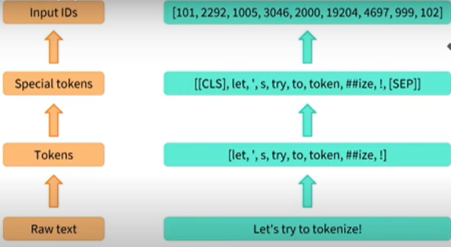

In [38]:
from transformers import AutoTokenizer

sequence = "Using a Transformer network is simple"
tokenizer= AutoTokenizer.from_pretrained("bert-base-cased")

tokens= tokenizer.tokenize(sequence)
print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


In [39]:
ids= tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


## Decoder

In [40]:
decoded= tokenizer.decode(ids)
print(decoded)

Using a Transformer network is simple


## Handling multiple sequences

In [41]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer= AutoTokenizer.from_pretrained(checkpoint)
model= AutoModelForSequenceClassification.from_pretrained(checkpoint)


input_sentence= ["I am a great guy with some anger problems",
                  "i am a healthy person with strict diet"]

tokens= tokenizer(input_sentence, padding=True, truncation=True, return_tensors="pt")
print(tokens)

{'input_ids': tensor([[ 101, 1045, 2572, 1037, 2307, 3124, 2007, 2070, 4963, 3471,  102],
        [ 101, 1045, 2572, 1037, 7965, 2711, 2007, 9384, 8738,  102,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])}


In [42]:
output=model(**tokens)
print(output.logits)

tensor([[-3.3904,  3.6138],
        [-3.4804,  3.6353]], grad_fn=<AddmmBackward0>)


Testing with a single input

In [43]:
input="i am a healthy person with strict diet"

tokens= tokenizer(input, padding=True, truncation=True, return_tensors="pt")
output=model(**tokens)

print(output.logits)

tensor([[-3.4804,  3.6353]], grad_fn=<AddmmBackward0>)
